In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h3
import folium
from branca.colormap import LinearColormap

In [269]:
df=pd.read_csv('/data/lab/STA326_Assignment2/datasets/data_orders.csv')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


## Q1

In [270]:
fai_ass_num = len(df.loc[(df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 1)])
fai_no_ass_num=len(df.loc[(df['order_status_key'] == 4) & (df['is_driver_assigned_key'] == 0)])
fai_rej_num=len(df.loc[(df['order_status_key'] == 9)])

if fai_ass_num > fai_no_ass_num and fai_ass_num > fai_rej_num:
    print(f"cancellations before assignment has the highest number {fai_ass_num}")
elif fai_no_ass_num > fai_ass_num and fai_no_ass_num > fai_rej_num:
    print(f"cancellations after assignment has the highest number {fai_no_ass_num}")
elif fai_rej_num > fai_ass_num and fai_rej_num > fai_no_ass_num:
    print(f"order rejection has the highest number {fai_rej_num}")

cancellations after assignment has the highest number 4496


### Calculate the number of all fail reason and find the cancellation after assignment has the highest number 4496

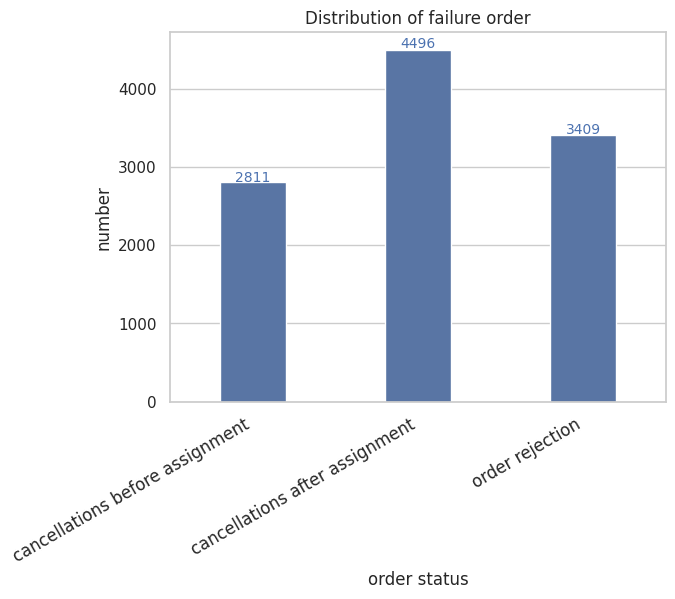

In [271]:
x = ['cancellations before assignment','cancellations after assignment','order rejection']
y = [fai_ass_num, fai_no_ass_num, fai_rej_num]

sns.barplot(x=x, y=y, width=0.4, dodge=False)

plt.xticks(rotation=30, size=12)  
plt.xticks(rotation=30, size=12, horizontalalignment='right')

plt.title('Distribution of failure order')
plt.xlabel('order status')   
plt.ylabel('number')

sns.set(style="whitegrid")

for i, v in enumerate(y):
    x_pos = i
    y_pos = v + v*0.017
    plt.text(x_pos, y_pos, str(v), ha='center', va='center', fontsize=10, color='b')

### Distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. 
### I use a bar plot to show the number of three kinds of reason and by analyzing the plot the number according to the descending order is cancellations after assignment , order rejection and cancellations before assignment

## Q2

In [272]:
df['hour'] = pd.to_datetime(df['order_datetime'], format='%H:%M:%S').dt.hour

In [273]:
list_day=[]
for i in range(24):
    list_hour=[]
    temp=df.loc[df['hour']==i]
    fai_ass_num_temp = len(temp.loc[(df['order_status_key'] == 4) & (temp['is_driver_assigned_key'] == 1)])
    fai_no_ass_num_temp=len(temp.loc[(df['order_status_key'] == 4) & (temp['is_driver_assigned_key'] == 0)])
    fai_rej_num_temp=len(temp.loc[(df['order_status_key'] == 9)])
    list_hour.append(fai_ass_num_temp)
    list_hour.append(fai_no_ass_num_temp)
    list_hour.append(fai_rej_num_temp)
    list_day.append(list_hour)
array_day=np.array(list_day)

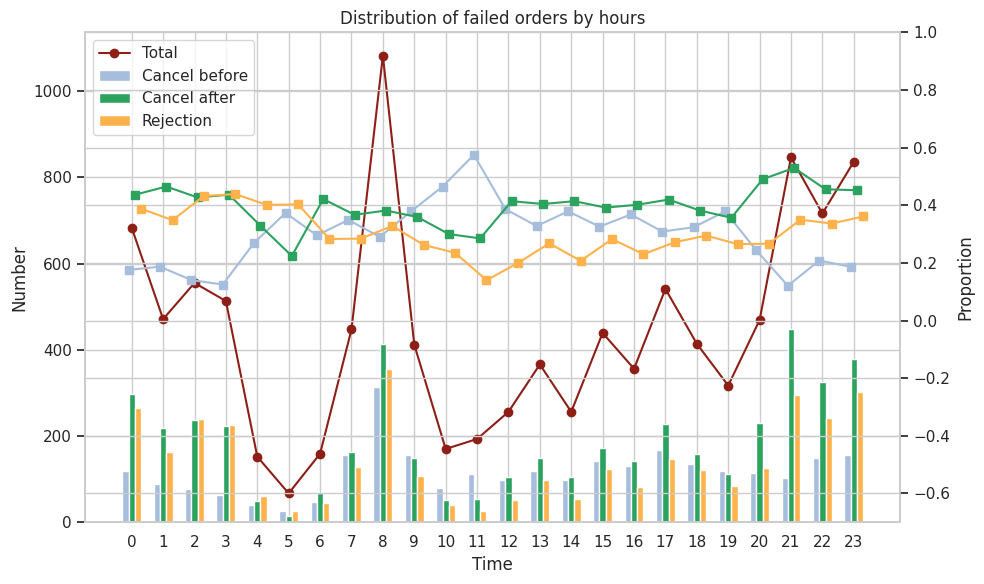

In [274]:
# 数据
categories = time_list = [f'{hour}' for hour in range(24)]  # 柱状图的类别
group_names = ['Cancel before', 'Cancel after', 'Rejection']  # 每组柱状图的名称
values = array_day  # 随机生成每组柱状图的值

# 计算总数
total_values = np.sum(values, axis=1)

# 计算每一类在每个小时的比例
proportions = values / np.sum(values, axis=1)[:, np.newaxis]

# 设置柱状图的参数
bar_width = 0.2  # 柱状图的宽度
index = np.arange(len(categories))  # 每个柱状图的索引

# 颜色选择
colors = ['#a6bddb', '#2ca25f', '#feb24c']  # 选择与柱状图对应的颜色
total_color='#8d1f17'


# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))  # 设置图形的宽度和高度
for i in range(len(group_names)):
    ax.bar(index + i * bar_width, values[:, i], bar_width, label=group_names[i], color=colors[i])
#     ax.pie(proportions[:, i], radius=bar_width/2, colors=['#FFD700', '#FF6347', '#00BFFF'],wedgeprops=dict(width=bar_width/2, edgecolor='white'))
    
# 绘制总数折线
ax.plot(index + bar_width * (len(group_names) - 1) / 2, total_values, marker='o', color=total_color, label='Total')

# 添加第二个y轴
ax2 = ax.twinx()

# 绘制每一类的比例曲线
for i, group_name in enumerate(group_names):
    ax2.plot(index + bar_width * (i + 0.5), proportions[:, i], color=colors[i], marker='s', label=f'{group_name} Proportion')

# 设置第二个y轴属性
ax2.set_ylabel('Proportion')
ax2.set_ylim(-0.7, 1)


# 设置图形属性
ax.set_xlabel('Time')
ax.set_ylabel('Number')
ax.set_title('Distribution of failed orders by hours')
ax.set_xticks(index + bar_width * (len(group_names) - 1) / 2)
ax.set_xticklabels(categories)
ax.legend()

# 获取图例句柄和标签
handles, labels = ax.get_legend_handles_labels()

# 合并图例
ax.legend(handles + lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

### I use a barplot combined with mutiple lines to display the result.

### At the bottom, bars show the number of three kinds of failure by hours. By observing this, we can have a directly view of the trend of number of three kinds

### The line chart features circular markers at each data point represent the total number of failure in each hour. By this line, we can find the number is decreasing from 0 am to 5 am. And the number quickly increasing from 5 am to 8 am and attain the maximum in a day at the 8 am. From 8 amto 10 am, the number have a sharp decrease in 2 hours. What's more, the total amount fluctuates upwards in the period of 10 am to the end of day. 8 am is the biggest failure in a day. As for the reason, 8 am is the time people go out and have a higher demend for taxi so the total number of failure is high as the total number of get taxi is high. Secondly, in this time the taxi is busy and people may wait long for a taxi and they may cancel as they can not bear to wait so long.

### The line chart uses rectangular markers at each data point represent the proportion of each class and the number is same to bar plot is they are the same class. When observeing the proportion line plot, the y axis is on the right side of the figure. From the lines, we can find that the proportion of cancel before assignment is below than 0.2 from 21pm to 3 am. And at the 11 am, cancel before assignment reach the highest point. And at 11 am the proportion of reject order reach the minimum point. And the cancel after assignment reach the maximum point at the time of 9 pm

## Q3

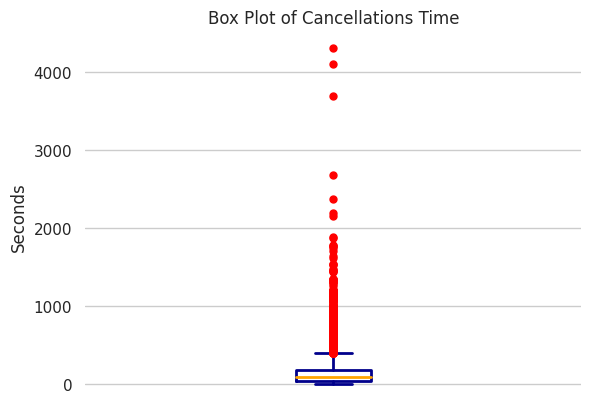

In [275]:
# 设置箱线图的样式
boxprops = dict(linewidth=2, color='darkblue')  # 设置箱体的线宽和颜色
medianprops = dict(linewidth=2, color='orange')  # 设置中位数线的线宽和颜色
whiskerprops = dict(linewidth=2, color='darkblue')  # 设置须线的线宽和颜色
capprops = dict(linewidth=2, color='darkblue')  # 设置箱线上界和下界的线宽和颜色
flierprops = dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red')  # 设置离群值的样式

# 绘制箱线图
plt.boxplot(df['cancellations_time_in_seconds'].dropna(), boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

# 设置y轴标签和标题
plt.ylabel('Seconds')
plt.title('Box Plot of Cancellations Time')

# 去除箱线图顶部和底部的边框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# 去除左侧和右侧的边框线
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 去除x轴的刻度标签
plt.xticks([])

# 显示图表
plt.show()

### From the box plot, we can view the value larger than 2000 as the outliner and remove them

In [276]:
df_rmout=df.loc[df['cancellations_time_in_seconds']<2000]

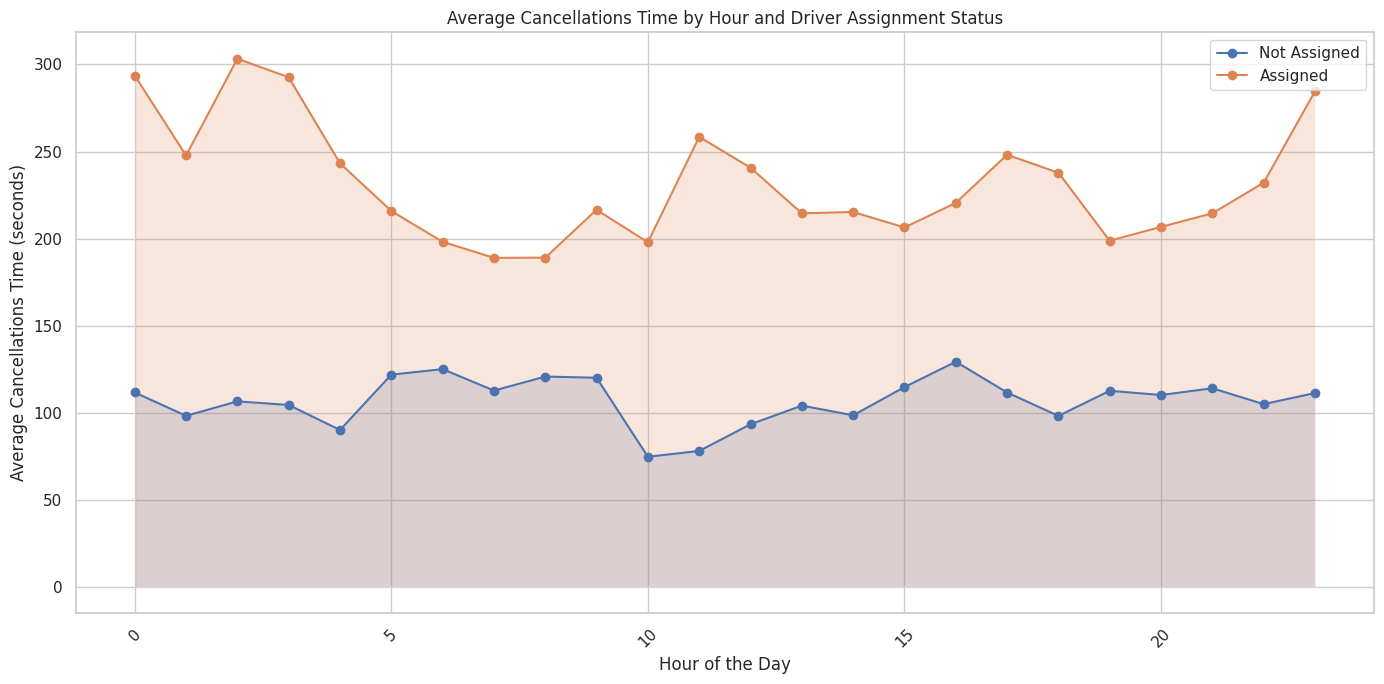

In [277]:
averages = df_rmout.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().reset_index()

# 根据is_driver_assigned_key的值将数据分为两组
group_0 = averages[averages['is_driver_assigned_key'] == 0]
group_1 = averages[averages['is_driver_assigned_key'] == 1]

# 设置画布和轴
plt.figure(figsize=(14, 7))

# 为is_driver_assigned_key == 0的组绘制折线图，并填充区域
plt.plot(group_0['hour'], group_0['cancellations_time_in_seconds'], marker='o', label='Not Assigned')
plt.fill_between(group_0['hour'], group_0['cancellations_time_in_seconds'], alpha=0.2)

# 为is_driver_assigned_key == 1的组绘制折线图，并填充区域
plt.plot(group_1['hour'], group_1['cancellations_time_in_seconds'], marker='o', label='Assigned')
plt.fill_between(group_1['hour'], group_1['cancellations_time_in_seconds'], alpha=0.2)
# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Average Cancellations Time by Hour and Driver Assignment Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Cancellations Time (seconds)')

# 旋转x轴标签，以免重叠
plt.xticks(rotation=45)

# 显示网格，使图表更易于阅读
plt.grid(True)

# 显示图表
plt.tight_layout()  # 调整布局以适应标签
plt.show()

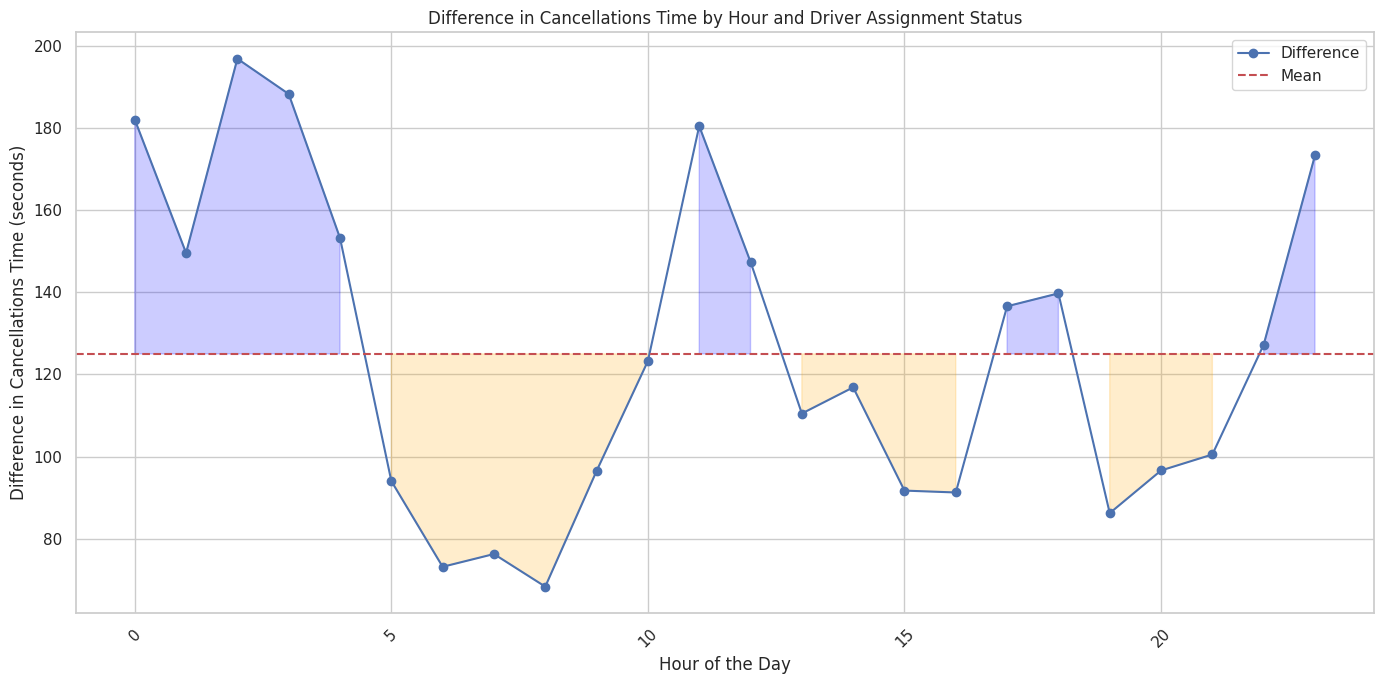

In [278]:
# 计算两组数据的差值
difference = group_1['cancellations_time_in_seconds'].reset_index(drop=True) - group_0['cancellations_time_in_seconds'].reset_index(drop=True)

# 设置画布和轴
plt.figure(figsize=(14, 7))

# 绘制差值的折线图，并填充区域
plt.plot(difference, marker='o', label='Difference')
# plt.fill_between(group_0['hour'], difference, alpha=0.2)

# 添加平均值的水平虚线
mean_difference = difference.mean()
plt.axhline(mean_difference, color='r', linestyle='--', label='Mean')

# 填充大于平均值的区域（使用蓝色填充）
plt.fill_between(np.arange(len(difference)), difference, mean_difference, where=difference >= mean_difference, alpha=0.2, color='blue')

# 填充小于平均值的区域（使用橙色填充）
plt.fill_between(np.arange(len(difference)), difference, mean_difference, where=difference < mean_difference, alpha=0.2, color='orange')
# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Difference in Cancellations Time by Hour and Driver Assignment Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Difference in Cancellations Time (seconds)')

# 旋转x轴标签，以免重叠
plt.xticks(rotation=45)

# 显示网格，使图表更易于阅读
plt.grid(True)

# 显示图表
plt.tight_layout()  # 调整布局以适应标签
plt.show()

### From the plot, we can find that the average cancellation time with driver is longer than the time with driver which I think is easy to understand as if the driver is assigned and the customer will think the process of waiting for the bus has moved on to the next stage, with a clearer waiting target. The difference between time will be small at the middle of day and will be larger in the early morning and in the late night. The reason is that either in early morning or in the late night, it is difficult to get a taxi so people tend to wait for a longer time.

### The second plot shows the difference in waiting times for two categories, with the average difference represented by a dashed line. Upon observation, the average difference in waiting times is slightly larger than 120 seconds, approximately two minutes. The periods when the difference is greater than the average are filled with blue color, while the periods when the difference is smaller are filled with orange color. We notice that from 5 AM to 10 AM, 1 PM to 4 PM, and 7 PM to 9 PM, the difference in waiting times is smaller than the average. For the remaining time periods, the difference in waiting times is greater than the average.

## Q4

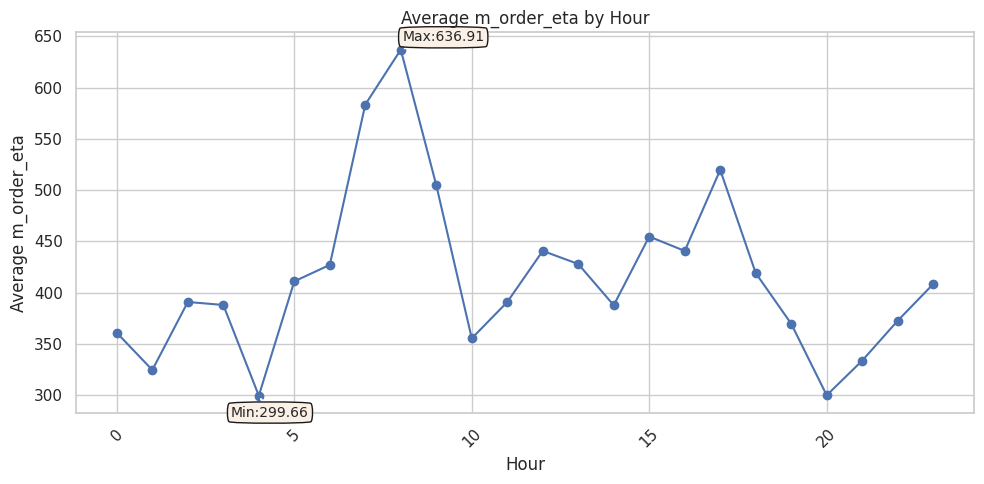

In [279]:
#eta means time before order arival, so we should filter the order_status_key equals to 4 and is_driver_assigned_key equals to 1
df_filter=df.loc[(df['order_status_key']==4) & (df['is_driver_assigned_key']==1)]
average_eta_df = df_filter.groupby('hour')['m_order_eta'].mean().reset_index()

# 找到平均值的最大值和最小值的索引
max_index = average_eta_df['m_order_eta'].idxmax()
min_index = average_eta_df['m_order_eta'].idxmin()
max_value = average_eta_df['m_order_eta'].max()
min_value = average_eta_df['m_order_eta'].min()

plt.figure(figsize=(10, 5))  # 设置图表的大小
plt.plot(average_eta_df['hour'], average_eta_df['m_order_eta'], marker='o')  # 绘制折线图，添加点标记

plt.annotate(f'Max:{max_value:.2f}', 
             xy=(average_eta_df['hour'][max_index], average_eta_df['m_order_eta'][max_index]),
             xytext=(1, 6),  # 根据需要调整偏移量
             textcoords='offset points',
             fontsize=10,
             bbox=dict(boxstyle='round4', fc='linen', ec='k', lw=1),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Min:{min_value:.2f}', 
             xy=(average_eta_df['hour'][min_index], average_eta_df['m_order_eta'][min_index]),
             xytext=(-20, -15),  # 根据需要调整偏移量
             textcoords='offset points',
             fontsize=10,
             bbox=dict(boxstyle='round4', fc='linen', ec='k', lw=1),
             arrowprops=dict(arrowstyle='->'))

plt.title('Average m_order_eta by Hour')  # 设置图表标题
plt.xlabel('Hour')  # 设置 x 轴标签
plt.ylabel('Average m_order_eta')  # 设置 y 轴标签
plt.grid(True)  # 显示网格线
plt.xticks(rotation=45)  # 旋转 x 轴标签，以免重叠

# 找到平均值的最大值和最小值的索引
max_index = average_eta_df['m_order_eta'].idxmax()
min_index = average_eta_df['m_order_eta'].idxmin()

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图表区域
plt.show()

### This line plot show the average ETA by hours. In the plot, we mark the maximum point and the minimum point. In the plot, we find that the average eta is at minimum when the time is 4 am and become largest at time in 8 am which is consistent with previous conclusion the distribution of fail number. I think the reason is easy to understand because in peak hour there are many people want to get taxi and as the result people need to wait longer

## Q5

In [280]:
import pandas as pd
import folium
import h3
from branca.colormap import linear

# Load your original dataset containing order information
# Assume the dataset is stored in a DataFrame called 'orders_df' with columns 'latitude', 'longitude'
points_df = df

# Calculate H3 hexagons at resolution 8 for each point
points_df['h3_hex'] = points_df.apply(lambda x: h3.geo_to_h3(x['origin_latitude'], x['origin_longitude'], 8), axis=1)

# Count the number of points within each hexagon
hex_counts = points_df['h3_hex'].value_counts().reset_index()
hex_counts.columns = ['h3_hex', 'point_count']

# Determine the H3 hexagons that contain 80% of all points
total_points = hex_counts['point_count'].sum()
threshold_point_count = total_points * 0.8
selected_hexes = hex_counts[hex_counts['point_count'].cumsum() <= threshold_point_count]['h3_hex']

# Create a color gradient for the number of points
max_point_count = hex_counts['point_count'].max()
colormap = linear.YlGnBu_09.scale(0, max_point_count)  # Adjust the colormap as needed

# Create a folium map
m = folium.Map(location=[points_df['origin_latitude'].mean(), points_df['origin_longitude'].mean()], zoom_start=10)

# Visualize the hexagons on the map, coloring them based on the number of points
for index, row in hex_counts.iterrows():
    color = colormap(row['point_count'])  # Color based on the point count
    folium.Polygon(
        locations=h3.h3_to_geo_boundary(row['h3_hex']),
        color=color,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

# Add the colormap to the map
colormap.caption = 'Point Count'
m.add_child(colormap)

# Save the map to an HTML file
m.save('hex_map_points_colored.html')

### we need to have 23 sizes 8 hexes contain 80% of all orders from the original data sets

In [281]:
len(selected_hexes)#六边形的数量

23

### The result is save in a html and this is a screenshot of the html page. And the color is correlation with the fail number

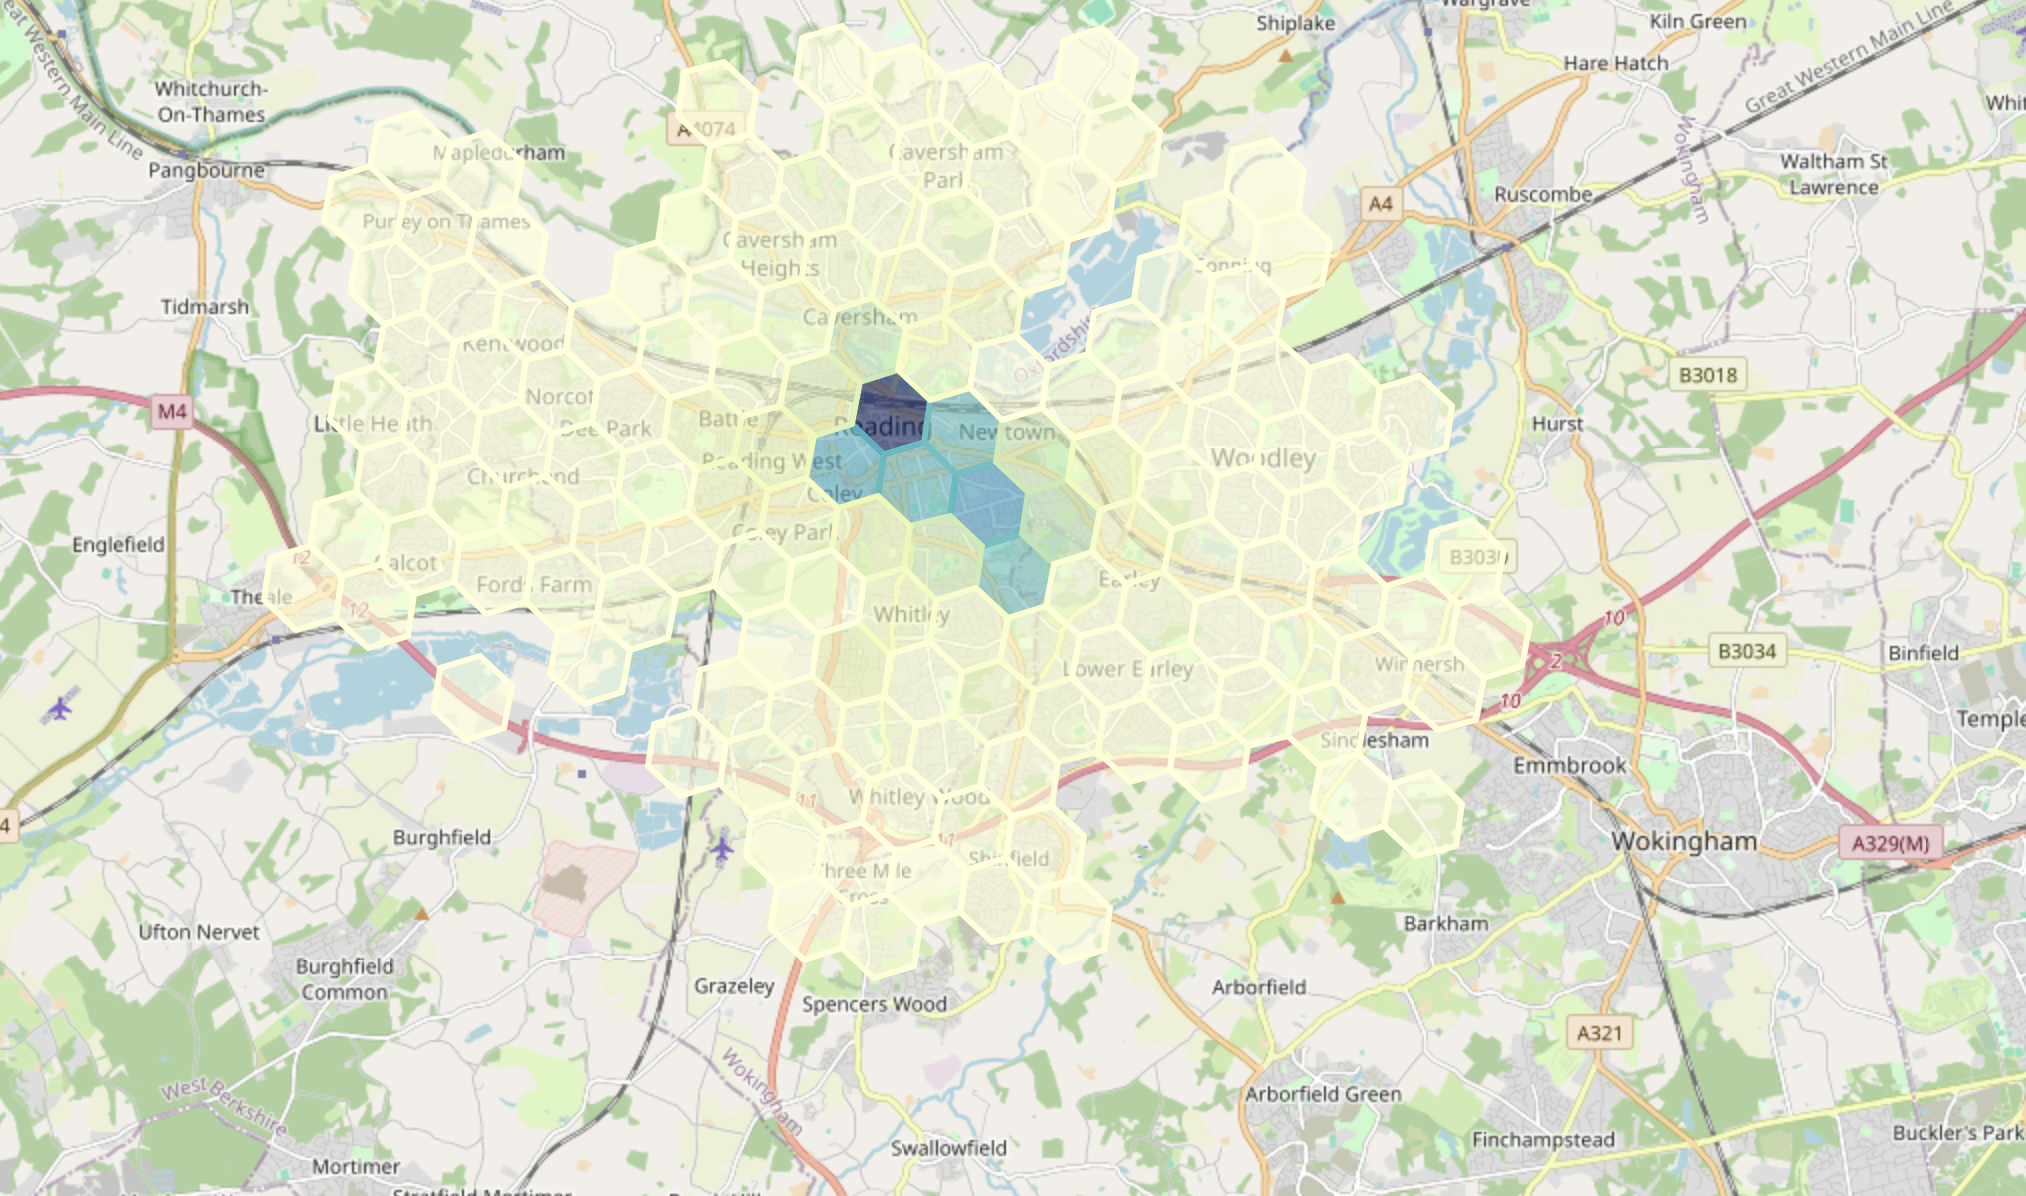

In [285]:
from IPython.display import Image
Image(filename='/data/lab/STA326_Assignment2/snapshot_hex.png')